# Coursera Capstone Project : "Finding Best Places to Eat in New York City"

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

#import beautiful soup
from urllib.request import urlopen
from bs4 import BeautifulSoup


print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1f             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0         conda-forge
    geopy:           1

## Fetching the geographical data for New York city

In [145]:
address = 'New York, New York'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of New York are 40.7127281, -74.0060152.


### Generating Foursquare Credentials

In [146]:
CLIENT_ID = 'CVDCQXUXRQCQT1CU5QE4IOCWGSRWJFIGOL4QH0GUJTUAHY3F' # your Foursquare ID
CLIENT_SECRET = 'L2IKFOZ1VECKMNU0E5YWHTSCJFDGTVUEDNECFEIWJ1U3QW5I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CVDCQXUXRQCQT1CU5QE4IOCWGSRWJFIGOL4QH0GUJTUAHY3F
CLIENT_SECRET:L2IKFOZ1VECKMNU0E5YWHTSCJFDGTVUEDNECFEIWJ1U3QW5I


#### Code for generating URL  venues using foursquare

In [147]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=CVDCQXUXRQCQT1CU5QE4IOCWGSRWJFIGOL4QH0GUJTUAHY3F&client_secret=L2IKFOZ1VECKMNU0E5YWHTSCJFDGTVUEDNECFEIWJ1U3QW5I&v=20180605&ll=40.7127281,-74.0060152&radius=500&limit=100'

### Getting Json files of the URL

In [148]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Result

In [149]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e99435271c428001bd39997'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Downtown Manhattan',
  'headerFullLocation': 'Downtown Manhattan, New York',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 84,
  'suggestedBounds': {'ne': {'lat': 40.7172281045, 'lng': -74.00008952063419},
   'sw': {'lat': 40.7082280955, 'lng': -74.0119408793658}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '57f0689d498e7d49d9189369',
       'name': 'The Bar Room at Temple Court',
       'location': {'address': '123 Nassau St',
        'lat': 40.7114477287544,
        'lng': -74.00680157032005,
        'label

## Creating a Dataframe 

In [150]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
#pull the actual data from the Foursquare API

venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
filtered_columns = ['venue.name', 'venue.id', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues

,venue.name,venue.id,venue.categories,venue.location.lat,venue.location.lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272
3,City Hall Park,3fd66200f964a520d8f11ee3,Park,40.712415,-74.006724
4,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734
8,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804


In [151]:
#fix the column names so they look relatively normal

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues


,name,id,categories,lat,lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
2,Alba Dry Cleaner & Tailor,4c606c3e1e5cd13ad1a1a1ed,Laundry Service,40.711434,-74.006272
3,City Hall Park,3fd66200f964a520d8f11ee3,Park,40.712415,-74.006724
4,Gibney Dance Center Downtown,53373f26498e940581c90985,Dance Studio,40.713923,-74.005661
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660
7,The Class by Taryn Toomey,58a253c830ecc66c9e5b40a0,Gym / Fitness Center,40.712753,-74.008734
8,CrossFit 212 TriBeCa,52001eed498e9ac16ca5e20b,Gym,40.714537,-74.005999
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804


In [153]:
# find a list of unique categories from the API so we can see what may or may not fit for restaurants

nearby_venues['categories'].unique()

array(['Hotel Bar', 'Hotel', 'Laundry Service', 'Park', 'Dance Studio',
       'Coffee Shop', 'French Restaurant', 'Gym / Fitness Center', 'Gym',
       'Bakery', 'Falafel Restaurant', 'Sandwich Place',
       'Indian Restaurant', 'Monument / Landmark', 'Taco Place',
       'Building', 'Yoga Studio', 'Boxing Gym', 'Pizza Place',
       'Burrito Place', 'Cuban Restaurant', 'Italian Restaurant',
       'Burger Joint', 'Café', 'Furniture / Home Store', 'Bar', 'Spa',
       'Antique Shop', 'Fast Food Restaurant', 'Coworking Space',
       'Juice Bar', 'Bookstore', "Women's Store", 'Japanese Restaurant',
       'Strip Club', 'Baby Store', 'American Restaurant', 'Cocktail Bar',
       'Sporting Goods Shop', 'Bubble Tea Shop', 'Wine Shop',
       'Nail Salon', 'Molecular Gastronomy Restaurant',
       'Sushi Restaurant', 'Comic Shop', 'Greek Restaurant',
       'Electronics Store', 'Cajun / Creole Restaurant', 'Plaza',
       'Japanese Curry Restaurant', 'Clothing Store',
       'Vegetarian /

### Removing identical items an by using unique method

In [155]:
# creating a list of categorie to remove from our dataframe because they are not restaurants
# I am sure there is a function that can be written to do this at scale but since it was a small list, I did it manually

removal_list = ['Laundry Service', 'Park', 'Dance Studio', 'Gym / Fitness Center', 'Gym', 'Monument / Landmark', 'Building', 'Yoga Studio', 'Boxing Gym', 'Burrito Place', 'Furniture / Home Store',
                'Spa', 'Antique Shop', 'Coworking Space', 'Bookstore', "Women's Store", 'Strip Club', 'Baby Store', 'Sporting Goods Shop', 'Nail Salon', 'Comic Shop', 'Electronics Store', 'Clothing Store', 
               'Shopping Mall', 'Health & Beauty Service', 'Theater', 'Medical Center']

nearby_venues2 = nearby_venues.copy()


#getting a clear dataframe of just restaurants
nearby_venues2 = nearby_venues2[~nearby_venues2['categories'].isin(removal_list)]
nearby_venues2

,name,id,categories,lat,lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853
11,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526
12,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994
13,Four Seasons Hotel New York Downtown,57c640ad498e74977f98372f,Hotel,40.712612,-74.009380
15,Los Tacos No. 1,5d5f24ec09484500079aee00,Taco Place,40.714267,-74.008756


## Generating a List of venues

In [156]:
#let's get a list of venues

venue_id_list = nearby_venues2['id'].tolist()
venue_id_list

['57f0689d498e7d49d9189369',
 '56d8c0f8498edb854f926e6a',
 '56093809498e5344ab8835a6',
 '58191674ded8f8626ed70af0',
 '4c154c9a77cea593c401d260',
 '515c4ca3e4b00279706b095d',
 '528bf16711d2b7722da6b51c',
 '575dea4c498e2739e43a27e2',
 '57c640ad498e74977f98372f',
 '5d5f24ec09484500079aee00',
 '56e7f585498ed6598b4030cd',
 '534c9d7b498e1bdd443a40e1',
 '5c6f03f30802d4002c16884c',
 '49c79540f964a520af571fe3',
 '4b311e89f964a520890025e3',
 '5447e0b2498e49ee7c7b1dc0',
 '576c8b3c498eecbf1adee8e9',
 '5787b68e498efcabbebba4f8',
 '588a4316326c5a4b60559f17',
 '50ba9119e4b071a4bae6dc10',
 '4db5fbfe43a1369cb5dc2a1f',
 '5ab51b6aa4b51b3dc096ed68',
 '53a7307a498e56d9917d8f32',
 '5953e5314382ab0b3b808dc6',
 '50b516ebe4b0e6a87400cafd',
 '4b60c708f964a520d0f829e3',
 '545c0436498e798e22ce4b2a',
 '5ae28a7b15173e002cef3271',
 '5b95344dc58ed7002cbe8a79',
 '5d4861420372ce0007e23375',
 '5bd4cc646adbf5002c1ced5c',
 '564cb952498e133963c04186',
 '5bec5ea23e67417691559498',
 '4a7f140cf964a520b4f21fe3',
 '4f627061e4b0

## fetching likes of venues using API

In [157]:
#set up to pull the likes from the API based on venue ID

url_list = []
like_list = []
json_list = []

for i in venue_id_list:
    venue_url = 'https://api.foursquare.com/v2/venues/{}/likes?client_id={}&client_secret={}&v={}'.format(i, CLIENT_ID, CLIENT_SECRET, VERSION)
    url_list.append(venue_url)
for link in url_list:
    result = requests.get(link).json()
    likes = result['response']['likes']['count']
    like_list.append(likes)
print(like_list)

[192, 208, 156, 239, 664, 88, 290, 53, 67, 77, 171, 120, 75, 295, 112, 100, 54, 506, 12, 403, 165, 66, 175, 52, 130, 270, 467, 34, 20, 5, 31, 164, 8, 22, 183, 564, 39, 90, 311, 303, 447, 173, 60, 68, 330, 185, 85, 326, 21, 10, 422, 4, 468, 537, 371, 404, 58, 51, 111, 135, 46, 236, 54, 6, 29]


In [158]:

#double check that we did not lose any venues based on if likes were available

print(len(like_list))
print(len(venue_id_list))

65
65


# Data preparation phase creating a copy of existing dataframe

In [159]:
#let's make a copy of our initial dataframe just in case anything goes wrong

NewYork_venues = nearby_venues2.copy()
NewYork_venues.head()

,name,id,categories,lat,lng
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804


## Adding total likes column to the df

In [160]:
# add in the list of likes

NewYork_venues['total likes'] = like_list
NewYork_venues.head()

,name,id,categories,lat,lng,total likes
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,192
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,208
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,156
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,239
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804,664


## Calculating the Min, Max, Mean, Median of Total likes Column

In [162]:

# now let's bin total likes

print(NewYork_venues['total likes'].max())
print(NewYork_venues['total likes'].min())
print(NewYork_venues['total likes'].median())
print(NewYork_venues['total likes'].mean())

664
4
120.0
178.73846153846154


## Plotting Histogram for showing Total likes 

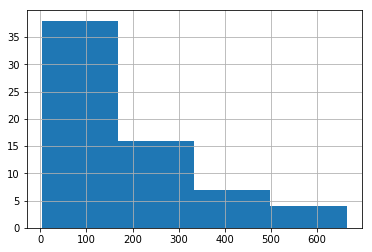

In [163]:
# let's visualize our total likes based on a histogram

import matplotlib.pyplot as plt
NewYork_venues['total likes'].hist(bins=4)
plt.show()

In [164]:
# what are the bins we want to use?

print(np.percentile(NewYork_venues['total likes'], 25))
print(np.percentile(NewYork_venues['total likes'], 50))
print(np.percentile(NewYork_venues['total likes'], 75))

53.0
120.0
290.0


## Rating the Venues Based on Total likes

In [165]:
# now we have our bin values so let's set them to the appropriate values
# less than 53, 53-120, 120-290, 290
# poor, below avg, abv avg, great

poor = NewYork_venues['total likes']<=53
below_avg = NewYork_venues[(NewYork_venues['total likes']>53) & (NewYork_venues['total likes']<=120)]
abv_avg = NewYork_venues[(NewYork_venues['total likes']>120) & (NewYork_venues['total likes']<=290)]
great = NewYork_venues['total likes']>290

In [166]:
# let's set up a function that will re-categorize our restaurants based on likes

def conditions(s):
    if s['total likes']<=53:
        return 'poor'
    if s['total likes']<=120:
        return 'below avg'
    if s['total likes']<=290:
        return 'avg avg'
    if s['total likes']>290:
        return 'great'

NewYork_venues['total likes_cat']=NewYork_venues.apply(conditions, axis=1)

In [167]:
NewYork_venues

,name,id,categories,lat,lng,total likes,total likes_cat
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,192,avg avg
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,208,avg avg
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,156,avg avg
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,239,avg avg
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804,664,great
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853,88,below avg
11,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526,290,avg avg
12,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,53,poor
13,Four Seasons Hotel New York Downtown,57c640ad498e74977f98372f,Hotel,40.712612,-74.009380,67,below avg
15,Los Tacos No. 1,5d5f24ec09484500079aee00,Taco Place,40.714267,-74.008756,77,below avg


In [168]:
# let's star the process for re-categorizing the categories

NewYork_venues['categories'].unique()

array(['Hotel Bar', 'Hotel', 'Coffee Shop', 'French Restaurant', 'Bakery',
       'Falafel Restaurant', 'Sandwich Place', 'Indian Restaurant',
       'Taco Place', 'Pizza Place', 'Cuban Restaurant',
       'Italian Restaurant', 'Burger Joint', 'Café', 'Bar',
       'Fast Food Restaurant', 'Juice Bar', 'Japanese Restaurant',
       'American Restaurant', 'Cocktail Bar', 'Bubble Tea Shop',
       'Wine Shop', 'Molecular Gastronomy Restaurant', 'Sushi Restaurant',
       'Greek Restaurant', 'Cajun / Creole Restaurant', 'Plaza',
       'Japanese Curry Restaurant', 'Vegetarian / Vegan Restaurant',
       'Breakfast Spot', 'Bagel Shop', 'Salad Place', 'Asian Restaurant',
       'Fried Chicken Joint', 'Korean Restaurant'], dtype=object)

In [170]:

bars = ['Hotel Bar', 'Bar', 'Juice Bar', 'Cocktail Bar']
other = ['Hotel', 'Bagel Shop', 'Bakery', 'Coffee Shop', 'Café', 'Sandwich Place', 'Bubble Tea Shop', 'Wine Shop', 'Plaza',  'Breakfast Spot', 'Salad Place']
euro_asia_indian_food = ['Falafel Restaurant', 'Italian Restaurant', 'Korean Restaurant', 'Cuban Restaurant', 'Fast Food Restaurant', 'Japanese Restaurant',
                         'Sushi Restaurant', 'Indian Restaurant', 'Japanese Restaurant', 'Greek Restaurant', 'French Restaurant', 
                          'Japanese Curry Restaurant', 'Vegetarian / Vegan Restaurant','Asian Restaurant']

american_food = [ 'Fried Chicken Joint', 'Molecular Gastronomy Restaurant', 'American Restaurant', 'Taco Place',]
italian_food = ['Italian Restaurant', 'Cajun / Creole Restaurant', 'Pizza Place']

def conditions2(s):
    if s['categories'] in bars:
        return 'bars'
    if s['categories'] in other:
        return 'other'
    if s['categories'] in euro_asia_indian_food:
        return 'euro_asia_indian_food'
    if s['categories'] in american_food:
        return 'american food'
    if s['categories'] in italian_food:
        return 'italian food'

NewYork_venues['categories_new']=NewYork_venues.apply(conditions2, axis=1)

In [171]:
NewYork_venues

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,192,avg avg,bars
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,208,avg avg,other
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,156,avg avg,other
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,239,avg avg,euro_asia_indian_food
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804,664,great,other
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853,88,below avg,euro_asia_indian_food
11,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526,290,avg avg,other
12,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,53,poor,euro_asia_indian_food
13,Four Seasons Hotel New York Downtown,57c640ad498e74977f98372f,Hotel,40.712612,-74.009380,67,below avg,other
15,Los Tacos No. 1,5d5f24ec09484500079aee00,Taco Place,40.714267,-74.008756,77,below avg,american food


## Onehot Encoding

In [172]:
# one hot encoding
NewYork_onehot = pd.get_dummies(NewYork_venues[['categories_new', 'total likes_cat']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NewYork_onehot['Name'] = NewYork_venues['name'] 

# move neighborhood column to the first column
fixed_columns = [NewYork_onehot.columns[-1]] + list(NewYork_onehot.columns[:-1])
NewYork_onehot = NewYork_onehot[fixed_columns]

NewYork_onehot.head()

,Name,american food,bars,euro_asia_indian_food,italian food,other,avg avg,below avg,great,poor
0,The Bar Room at Temple Court,0,1,0,0,0,1,0,0,0
1,"The Beekman, A Thompson Hotel",0,0,0,0,1,1,0,0,0
5,The Wooly Daily,0,0,0,0,1,1,0,0,0
6,Augustine,0,0,1,0,0,1,0,0,0
9,Takahachi Bakery,0,0,0,0,1,0,0,1,0


# K-Means Clustering

In [205]:
cluster_df = NewYork_onehot.drop('Name', axis=1)

k_clusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=k_clusters, random_state=0).fit(cluster_df)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 2, 2, 4, 1, 3, 2, 0, 3, 3], dtype=int32)

## Creating/adding label

In [206]:
NewYork_venues['label'] = kmeans.labels_
NewYork_venues.head()

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,192,avg avg,bars,2
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,208,avg avg,other,2
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,156,avg avg,other,2
6,Augustine,58191674ded8f8626ed70af0,French Restaurant,40.711310,-74.006660,239,avg avg,euro_asia_indian_food,4
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804,664,great,other,1


# Creating map 

In [208]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NewYork_venues['lat'], NewYork_venues['lng'], NewYork_venues['name'], NewYork_venues['label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Clustering the data 

### Cluster 1 Where label is assigned with 0 shows the rating for poor quality of food

In [209]:
NewYork_venues.loc[NewYork_venues['label']==0]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
12,Aahar Indian Cuisine,575dea4c498e2739e43a27e2,Indian Restaurant,40.713307,-74.007994,53,poor,euro_asia_indian_food,0
28,Pisillo Italian Cafe,588a4316326c5a4b60559f17,Café,40.710493,-74.007546,12,poor,other,0
40,Konditori,5953e5314382ab0b3b808dc6,Café,40.709474,-74.006630,52,poor,other,0
49,Primo’s,5ae28a7b15173e002cef3271,Cocktail Bar,40.715501,-74.008977,34,poor,bars,0
50,Recreation,5b95344dc58ed7002cbe8a79,Bar,40.710773,-74.007912,20,poor,bars,0
52,Maestro Pasta,5d4861420372ce0007e23375,Italian Restaurant,40.709337,-74.007769,5,poor,euro_asia_indian_food,0
53,Moxy NYC Downtown,5bd4cc646adbf5002c1ced5c,Hotel,40.710662,-74.007969,31,poor,other,0
56,Gong Cha,5bec5ea23e67417691559498,Bubble Tea Shop,40.710704,-74.009257,8,poor,other,0
57,Frankly Wines,4a7f140cf964a520b4f21fe3,Wine Shop,40.714477,-74.010039,22,poor,other,0
62,Evening Bar,545a8c16498eeafe6d52b176,Hotel Bar,40.715301,-74.009347,39,poor,bars,0


## Cluster 2 : shows rating for Great quality of food 

In [210]:
NewYork_venues.loc[NewYork_venues['label']==1]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
9,Takahachi Bakery,4c154c9a77cea593c401d260,Bakery,40.713653,-74.008804,664,great,other,1
23,Blue Spoon Coffee Co.,49c79540f964a520af571fe3,Coffee Shop,40.714428,-74.006859,295,great,other,1
27,Shake Shack,5787b68e498efcabbebba4f8,Burger Joint,40.710703,-74.009024,506,great,None,1
31,Nish Nūsh,50ba9119e4b071a4bae6dc10,Falafel Restaurant,40.715537,-74.007725,403,great,euro_asia_indian_food,1
48,Little Park,545c0436498e798e22ce4b2a,American Restaurant,40.715487,-74.009133,467,great,american food,1
61,Ward III,4a411ea5f964a520cba41fe3,Cocktail Bar,40.715885,-74.008714,564,great,bars,1
64,Takahachi,4a8f2f39f964a520471420e3,Sushi Restaurant,40.716526,-74.008101,311,great,euro_asia_indian_food,1
65,Mulberry & Vine,5171b5cc011cef9833bbb787,Café,40.715177,-74.010227,303,great,other,1
67,GRK Fresh Greek - Financial District,5047c785e4b0bcc0f416cdb3,Greek Restaurant,40.709800,-74.007011,447,great,euro_asia_indian_food,1
72,Oculus Plaza,5984eeb39be522744003dee5,Plaza,40.711822,-74.011632,330,great,other,1


## Cluster 3: shows avg  rated category food

In [211]:
NewYork_venues.loc[NewYork_venues['label']==2]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
0,The Bar Room at Temple Court,57f0689d498e7d49d9189369,Hotel Bar,40.711448,-74.006802,192,avg avg,bars,2
1,"The Beekman, A Thompson Hotel",56d8c0f8498edb854f926e6a,Hotel,40.711173,-74.006702,208,avg avg,other,2
5,The Wooly Daily,56093809498e5344ab8835a6,Coffee Shop,40.712137,-74.008395,156,avg avg,other,2
11,Pisillo Italian Panini,528bf16711d2b7722da6b51c,Sandwich Place,40.710530,-74.007526,290,avg avg,other,2
17,Birch Coffee,56e7f585498ed6598b4030cd,Coffee Shop,40.710759,-74.005953,171,avg avg,other,2
32,Maxwell's Bar & Restaurant,4db5fbfe43a1369cb5dc2a1f,Bar,40.714944,-74.006485,165,avg avg,bars,2
39,Melt Shop,53a7307a498e56d9917d8f32,Sandwich Place,40.709807,-74.006723,175,avg avg,other,2
41,Magic Mix Juicery,50b516ebe4b0e6a87400cafd,Juice Bar,40.709699,-74.006898,130,avg avg,bars,2
60,Atera,4f627061e4b05c1d57815977,Molecular Gastronomy Restaurant,40.716752,-74.005712,183,avg avg,american food,2
68,Voyager Espresso,566de7e3498e30e4798117ae,Coffee Shop,40.708787,-74.007063,173,avg avg,other,2


# Cluster 4: Shows below Average Rated food

In [212]:
NewYork_venues.loc[NewYork_venues['label']==3]

,name,id,categories,lat,lng,total likes,total likes_cat,categories_new,label
10,The Hummus & Pita Co,515c4ca3e4b00279706b095d,Falafel Restaurant,40.714453,-74.006853,88,below avg,euro_asia_indian_food,3
13,Four Seasons Hotel New York Downtown,57c640ad498e74977f98372f,Hotel,40.712612,-74.009380,67,below avg,other,3
15,Los Tacos No. 1,5d5f24ec09484500079aee00,Taco Place,40.714267,-74.008756,77,below avg,american food,3
19,Racines,534c9d7b498e1bdd443a40e1,French Restaurant,40.714754,-74.007581,120,below avg,euro_asia_indian_food,3
21,Joe’s Pizza,5c6f03f30802d4002c16884c,Pizza Place,40.710318,-74.007694,75,below avg,italian food,3
24,Sophie's Cuban Cuisine,4b311e89f964a520890025e3,Cuban Restaurant,40.714803,-74.007656,112,below avg,euro_asia_indian_food,3
25,Da Claudio,5447e0b2498e49ee7c7b1dc0,Italian Restaurant,40.710826,-74.007639,100,below avg,euro_asia_indian_food,3
26,Hank's Juicy Beef,576c8b3c498eecbf1adee8e9,Sandwich Place,40.714349,-74.007215,54,below avg,other,3
36,Chick-fil-A,5ab51b6aa4b51b3dc096ed68,Fast Food Restaurant,40.710419,-74.008550,66,below avg,euro_asia_indian_food,3
63,Chambers Street Wines,4adcf23cf964a520cc6221e3,Wine Shop,40.715773,-74.009718,90,below avg,other,3
